##### Jitne 1 k hai utne hi 0 ke samples hai. That is called UnderSampling.

### 0 - NON FRAUD 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
np.unique(data["Class"])

array([0, 1], dtype=int64)

In [7]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
data = data.drop(columns=["Time"])

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()

In [11]:
data["Amount"] = sc.fit_transform(data[["Amount"]])

In [12]:
x = data.drop(columns = ["Class"])

In [13]:
y = data["Class"]

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [18]:
acc = accuracy_score(ytest,ypred)
acc

0.999420666409185

<AxesSubplot:>

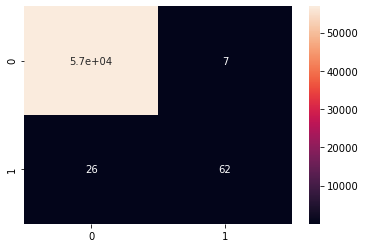

In [19]:
con = confusion_matrix(ytest,ypred)
sns.heatmap(con,annot = True)

In [20]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.90      0.70      0.79        88

    accuracy                           1.00     56962
   macro avg       0.95      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962



As we can see, accuracy for 0 and for 1 is low. That means the data is imbalanced. 

### UnderSampling

In [21]:
#under sampling
## taking index wheere class is 0 ie non fraud and same for fraud ie class == 1
nonfraud = data[data.Class == 0].index
nonfraud

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)

In [22]:
fraud = data[data.Class == 1].index
fraud

Int64Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
              6338,   6427,
            ...
            274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149,
            281144, 281674],
           dtype='int64', length=492)

In [23]:
random_nofraud = np.array(np.random.choice(nonfraud, len(fraud), replace = False))
undersample_index = np.concatenate([fraud, random_nofraud ])

In [24]:
undersample = data.iloc[undersample_index,:]

In [25]:
undersample.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.606031,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117342,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349231,1


In [26]:
undersample.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [27]:
x = undersample.drop(columns = ["Class"])
y = undersample["Class"]

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [29]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

In [30]:
acc = accuracy_score(ytest,ypred)
acc

0.934010152284264

<AxesSubplot:>

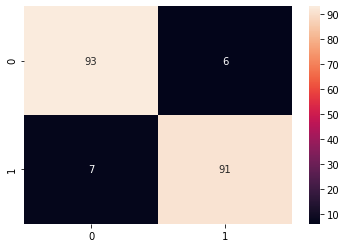

In [31]:
con = confusion_matrix(ytest,ypred)
sns.heatmap(con,annot = True)

In [32]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        99
           1       0.94      0.93      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



### OverSampling

In [33]:
nofraud = data[data.Class == 0].index
fraud = np.array(data[data['Class'] == 1].index)

random_index = np.array(np.random.choice(fraud, len(nofraud)))

oversample = np.concatenate([nofraud, random_index])

oversample = data.iloc[oversample, :]

x = oversample.drop(columns=['Class'])
y = oversample['Class']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [34]:
model=LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
ypred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [35]:
acc=accuracy_score(ytest,ypred)
acc

0.9497124668061833

<AxesSubplot:>

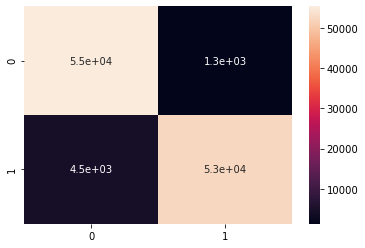

In [36]:
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [37]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56713
           1       0.98      0.92      0.95     57013

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

